In [1]:
import wfdb #WaveForm-Database package. A library of tools for reading, writing, and processing WFDB signals and annotations.
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import csv
import gc

In [2]:
df = pd.read_csv('../../data/raw/sudden_death_patients/37.txt',sep=';')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-e228036eaa22>", line 1, in <module>
    df = pd.read_csv('../../data/raw/sudden_death_patients/37.txt',sep=';')
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 686, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 458, in _read
    data = parser.read(nrows)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 1196, in read
    ret = self._engine.read(nrows)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 2155, in read
    data = self._reader.read(nrows)
  File "pandas\_libs\parsers.pyx", line 847, in pandas._libs.parsers.TextReader.read
  File "pandas\_libs\parsers.pyx", line 862, in pandas._libs.

TypeError: object of type 'NoneType' has no len()

In [ ]:
df


KeyboardInterrupt



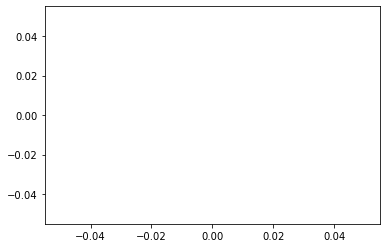

In [20]:
sns.lineplot(x=df.index,y=df['0'])
plt.show()

In [ ]:
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])

In [3]:
for i in range(30,53):
    url = f'https://physionet.org/files/sddb/1.0.0/{i}.hea?download'
    urllib.request.urlretrieve(url,f'../../data/origin/{i}.hea')
    
    url = f'https://physionet.org/files/sddb/1.0.0/{i}.dat?download'
    urllib.request.urlretrieve(url,f'../../data/origin/{i}.dat')
    
    
    record = wfdb.rdsamp(f'../../data/origin/{i}')
    record=np.asarray(record[0])
    
    path=f'../../data/raw/{i}.txt'
    pd.DataFrame(record).to_csv(path,sep=';')


KeyboardInterrupt



In [15]:
df = pd.read_csv('holter_list.csv',sep=',')

In [16]:
df

,Signals,Header,Unaudited,Audited,Signal,VF Onset
0,30.dat,30.hea,30.ari,30.atr,24:33:17,07:54:33
1,31.dat,31.hea,31.ari,31.atr,13:58:40,13:42:24
2,32.dat,32.hea,32.ari,32.atr,24:20:00,16:45:18
3,33.dat,33.hea,33.ari,NaN,24:33:00,04:46:19
4,34.dat,34.hea,34.ari,34.atr,07:05:20,06:35:44
5,35.dat,35.hea,35.ari,35.atr,24:52:00,24:34:56
6,36.dat,36.hea,36.ari,36.atr,20:21:20,18:59:01
7,37.dat,37.hea,37.ari,NaN,25:08:00,01:31:13
8,38.dat,38.hea,38.ari,NaN,18:18:25,08:01:54
9,39.dat,39.hea,39.ari,NaN,05:47:00,04:37:51


In [17]:
df['filename'] = df['Signals'].str.replace(r'(\S+).dat',r'\1',regex=True) + '.txt'

In [18]:
df['signal_time'] = (df['Signal'].str.replace(r'(\S+):(\S+):(\S+)',r'\1',regex=True).astype(int) * 3600\
                    + df['Signal'].str.replace(r'(\S+):(\S+):(\S+)',r'\2',regex=True).astype(int) * 60\
                    + df['Signal'].str.replace(r'(\S+):(\S+):(\S+)',r'\3',regex=True).astype(int)) * 250

In [19]:
df['ventricular_fibrilation'] = (df['VF Onset'].str.replace(r'(\S+):(\S+):(\S+)',r'\1',regex=True).astype(int) * 3600\
                    + df['VF Onset'].str.replace(r'(\S+):(\S+):(\S+)',r'\2',regex=True).astype(int) * 60\
                    + df['VF Onset'].str.replace(r'(\S+):(\S+):(\S+)',r'\3',regex=True).astype(int)) * 250

In [20]:
df.drop(columns = ['Signals','Header','Unaudited','Audited','Signal','VF Onset'],inplace = True)

In [21]:
df

,filename,signal_time,ventricular_fibrilation
0,30.txt,22099250,7118250
1,31.txt,12580000,12336000
2,32.txt,21900000,15079500
3,33.txt,22095000,4294750
4,34.txt,6380000,5936000
5,35.txt,22380000,22124000
6,36.txt,18320000,17085250
7,37.txt,22620000,1368250
8,38.txt,16476250,7228500
9,39.txt,5205000,4167750


In [22]:
df['ventricular_fibrilation'] / 1250

0      5694.6
1      9868.8
2     12063.6
3      3435.8
4      4748.8
5     17699.2
6     13668.2
7      1094.6
8      5782.8
9      3334.2
10        0.0
11     2152.8
12        0.0
13    11246.2
14    14145.0
15    13071.4
16     2661.4
17     4476.2
18     1796.0
19        0.0
20     8468.6
21    16540.6
22     1832.0
Name: ventricular_fibrilation, dtype: float64

In [23]:
df['image_number'] = np.ceil(df['ventricular_fibrilation'] / 1250)

In [24]:
df['image_number'].sum()

153789.0

In [25]:
lista_filenames = list(df['filename'].unique())

In [26]:
lista_filenames.remove('30.txt')
lista_filenames.remove('31.txt')
lista_filenames.remove('32.txt')
lista_filenames.remove('33.txt')
lista_filenames.remove('34.txt')
lista_filenames.remove('35.txt')
lista_filenames.remove('36.txt')
lista_filenames.remove('37.txt')
lista_filenames.remove('40.txt')
lista_filenames.remove('42.txt')
lista_filenames.remove('49.txt')

In [27]:
lista_filenames

['38.txt',
 '39.txt',
 '41.txt',
 '43.txt',
 '44.txt',
 '45.txt',
 '46.txt',
 '47.txt',
 '48.txt',
 '50.txt',
 '51.txt',
 '52.txt']

In [29]:
df

,filename,signal_time,ventricular_fibrilation,image_number
0,30.txt,22099250,7118250,5695.0
1,31.txt,12580000,12336000,9869.0
2,32.txt,21900000,15079500,12064.0
3,33.txt,22095000,4294750,3436.0
4,34.txt,6380000,5936000,4749.0
5,35.txt,22380000,22124000,17700.0
6,36.txt,18320000,17085250,13669.0
7,37.txt,22620000,1368250,1095.0
8,38.txt,16476250,7228500,5783.0
9,39.txt,5205000,4167750,3335.0


In [28]:
import random

In [ ]:
for filename in lista_filenames:
    
    plot = pd.read_csv(f'../../data/raw/sudden_death_patients/{filename}',sep=';')
    plot.drop(columns = 'Unnamed: 0',inplace = True)
    plot['time'] = (plot.index + 1) * 0.004
    i = 0
    total_length= int(df.loc[df['filename'] == filename,'image_number'].values[0])
    
    random_numbers = []
    while len(random_numbers) != 600:
        x = random.randint(0,3000)
        if x in random_numbers:
            pass
        else:
            random_numbers.append(x)
    
    for i in random_numbers:
        row_min = int(i * 1250)
        row_max = int((i + 1) * 1250)
        time_min = int(row_min * 0.004)
        time_max = int(row_max * 0.004)
        plt.figure(figsize=[20,10])
        line_plot = sns.lineplot(data = plot.iloc[row_min:row_max],x='time',y='0')
        plt.axis('off')
        fig = line_plot.get_figure()
        #fig.savefig(f'../../data/interim/train_data/sudden_death_patients/{filename}_{time_min}s-{time_max}s.png')
        fig.savefig(f'../../../sudden_death_validation_plus/{filename}_{time_min}s-{time_max}s.png')
        plt.close(fig)
        if (i == int(total_length * 0.1)) or (i == int(total_length * 0.2)) or (i == int(total_length * 0.3))\
        or (i == int(total_length * 0.4)) or (i == int(total_length * 0.5)) or (i == int(total_length * 0.6))\
        or (i == int(total_length * 0.7)) or (i == int(total_length * 0.8)) or (i == int(total_length * 0.9))\
        or (i == total_length - 1):
            gc.collect()
            print('Garbage Collected')

Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected
Garbage Collected


## Dados extras para a validação

In [32]:
row_min

4532

In [33]:
row_max

7227500

In [37]:
(y - 1) * 1250

7226250

In [38]:
for filename in lista_filenames:
    
    plot = pd.read_csv(f'../../data/raw/sudden_death_patients/{filename}',sep=';')
    plot.drop(columns = 'Unnamed: 0',inplace = True)
    plot['time'] = (plot.index + 1) * 0.004
    i = 0
    total_length= int(df.loc[df['filename'] == filename,'image_number'].values[0])
    
    for i in range(200):
        y = total_length - i
        row_min = int((y - 1) * 1250)
        row_max = int((y) * 1250)
        time_min = int(row_min * 0.004)
        time_max = int(row_max * 0.004)
        plt.figure(figsize=[20,10])
        line_plot = sns.lineplot(data = plot.iloc[row_min:row_max],x='time',y='0')
        plt.axis('off')
        fig = line_plot.get_figure()
        #fig.savefig(f'../../data/interim/train_data/sudden_death_patients/{filename}_{time_min}s-{time_max}s.png')
        fig.savefig(f'../../../sudden_death_validation_plus/{filename}_{time_min}s-{time_max}s.png')
        plt.close(fig)
        if (i == int(total_length * 0.1)) or (i == int(total_length * 0.2)) or (i == int(total_length * 0.3))\
        or (i == int(total_length * 0.4)) or (i == int(total_length * 0.5)) or (i == int(total_length * 0.6))\
        or (i == int(total_length * 0.7)) or (i == int(total_length * 0.8)) or (i == int(total_length * 0.9))\
        or (i == total_length - 1):
            gc.collect()
            print('Garbage Collected')

Garbage Collected
Garbage Collected
